In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import requests

import datetime as dt
# import scipy.stats as stats 
# import os
# import random
# import math
# import itertools as it

from scipy.optimize import curve_fit


In [2]:
#Settings for plotting

fs_label = 16

parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }

plt.rcParams.update(parameters)

saveplots = True
save_loc = "figs/"
save_formats = ["pdf", "png"]

# rcParams.keys()

# locale.setlocale(locale.LC_TIME, "Danish") 


In [3]:
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)


yearweek_to_date = lambda d, weekday="-1": dt.datetime.strptime(d + weekday, "%Y-%W-%w")
#this is stolen from rasmus' notebook
# yearweek_to_date = lambda x: dt.date.fromisocalendar(int(x[:4]),int(x[5:]),1)

#def getPercVar(df,country_code,variant):
#    curDF = getBestDatabase(df,country_code,variant)
#     return (curDF.Dates,curDF.percent_variant2)


# Model tests
logistic_model = lambda t, alpha, y0: 1/(1+((1-y0)/y0)*np.exp(-alpha*t))
lin_model = lambda t, alpha, b: b + alpha*t

#def date_window(start_date=first_date, stop_date=last_date):
    

In [4]:
#Error analysis:
#    probability p changes over time as a logistic.
#    the sampling of the population at any point in time is binomial as a function of p
#    the standard std of a binomial is \sigma=sqrt(Np(1-p))
std_binom = lambda p, n: np.sqrt(p*(1-p)/n)


In [5]:
url = "https://opendata.ecdc.europa.eu/covid19/virusvariant/csv/data.csv"
path=""
filename="variants_data.csv"
download_url(url, path+filename)

In [14]:
df = pd.read_csv(path+filename)

print(df.country.unique())
print(df.variant.unique())

countries = ['Denmark', 
             # 'Finland', 
             # 'France', 
             'Germany', 
             # 'Iceland', 
             'Ireland', 
             # 'Italy', 
             'Netherlands', 
             'Norway', 
             'Poland', 
             #'Romania', 
             # 'Sweden'
            ]
# country_codes = ["DK", "NO", "SE", "FI"]

#defining a list over all variants of interest, such that: 
    # all but the first elements constitute the variants we really want to investigate.
    # all but the last elements are the "supplementing" variant that 
    #     dominated previous to the one being investigated.
dominating_variants = ['UNK', 'B.1.1.7', 'B.1.617.2']
variants, suppl_variants = dominating_variants[1:], dominating_variants[:-1]

# select data to plot:
filt = (df.country.isin(countries) & df.variant.isin(variants))
df = df[filt]

# generate what is needed, clean out what is not
df["date"] = df.year_week.apply(yearweek_to_date)
df['percent_variant'] = np.divide(df.number_detections_variant, df.number_sequenced)
df['err_percent_variant'] = std_binom(df.percent_variant, df.number_sequenced)

df['percent_variant_adjusted'] = np.divide(df.number_detections_variant+2, df.number_sequenced+4)
df['err_percent_variant_adjusted'] = std_binom(df.percent_variant_adjusted, df.number_sequenced+4)

df.drop(columns=["year_week", "country_code"], inplace=True)

df

['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Malta' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden']
['B.1.1.7' 'B.1.1.7+E484K' 'B.1.351' 'B.1.427/B.1.429' 'B.1.525' 'B.1.526'
 'B.1.616' 'B.1.617' 'B.1.617.1' 'B.1.617.2' 'B.1.617.3' 'B.1.620'
 'B.1.621' 'C.1.2' 'C.37' 'P.1' 'P.3' 'Other' 'UNK']


,country,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,percent_variant,date,err_percent_variant,percent_variant_adjusted,err_percent_variant_adjusted
5556,Denmark,GISAID,3043.0,434,14.3,Yes,B.1.1.7,0,0.000000,2020-10-05,0.000000,0.004566,0.003221
5565,Denmark,GISAID,3043.0,434,14.3,Yes,B.1.617.2,0,0.000000,2020-10-05,0.000000,0.004566,0.003221
5574,Denmark,GISAID,2742.0,397,14.5,Yes,B.1.1.7,0,0.000000,2020-10-12,0.000000,0.004988,0.003518
5583,Denmark,GISAID,2742.0,397,14.5,Yes,B.1.617.2,0,0.000000,2020-10-12,0.000000,0.004988,0.003518
5592,Denmark,GISAID,2970.0,1154,38.9,Yes,B.1.1.7,0,0.000000,2020-10-19,0.000000,0.001727,0.001220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22614,Poland,TESSy,557.0,44,7.9,Yes,B.1.617.2,37,0.840909,2021-07-05,0.055141,0.812500,0.056337
22617,Poland,TESSy,626.0,63,10.1,Yes,B.1.1.7,3,0.047619,2021-07-12,0.026830,0.074627,0.032105
22619,Poland,TESSy,626.0,63,10.1,Yes,B.1.617.2,54,0.857143,2021-07-12,0.044087,0.835821,0.045256
22623,Poland,TESSy,729.0,46,6.3,Yes,B.1.1.7,42,0.913043,2021-07-19,0.041545,0.880000,0.045957


2020-11-16T00:00:00.000000000 2021-05-31T00:00:00.000000000
2021-03-29T00:00:00.000000000 2021-07-26T00:00:00.000000000
2020-10-05T00:00:00.000000000 2021-04-26T00:00:00.000000000
2021-02-01T00:00:00.000000000 2021-07-19T00:00:00.000000000
2020-10-26T00:00:00.000000000 2021-03-01T00:00:00.000000000
2021-03-29T00:00:00.000000000 2021-07-19T00:00:00.000000000
2020-11-16T00:00:00.000000000 2021-05-03T00:00:00.000000000
2021-03-01T00:00:00.000000000 2021-07-12T00:00:00.000000000
2020-11-23T00:00:00.000000000 2021-05-10T00:00:00.000000000
2021-04-12T00:00:00.000000000 2021-07-26T00:00:00.000000000
2020-12-28T00:00:00.000000000 2021-04-19T00:00:00.000000000
2021-04-19T00:00:00.000000000 2021-07-12T00:00:00.000000000


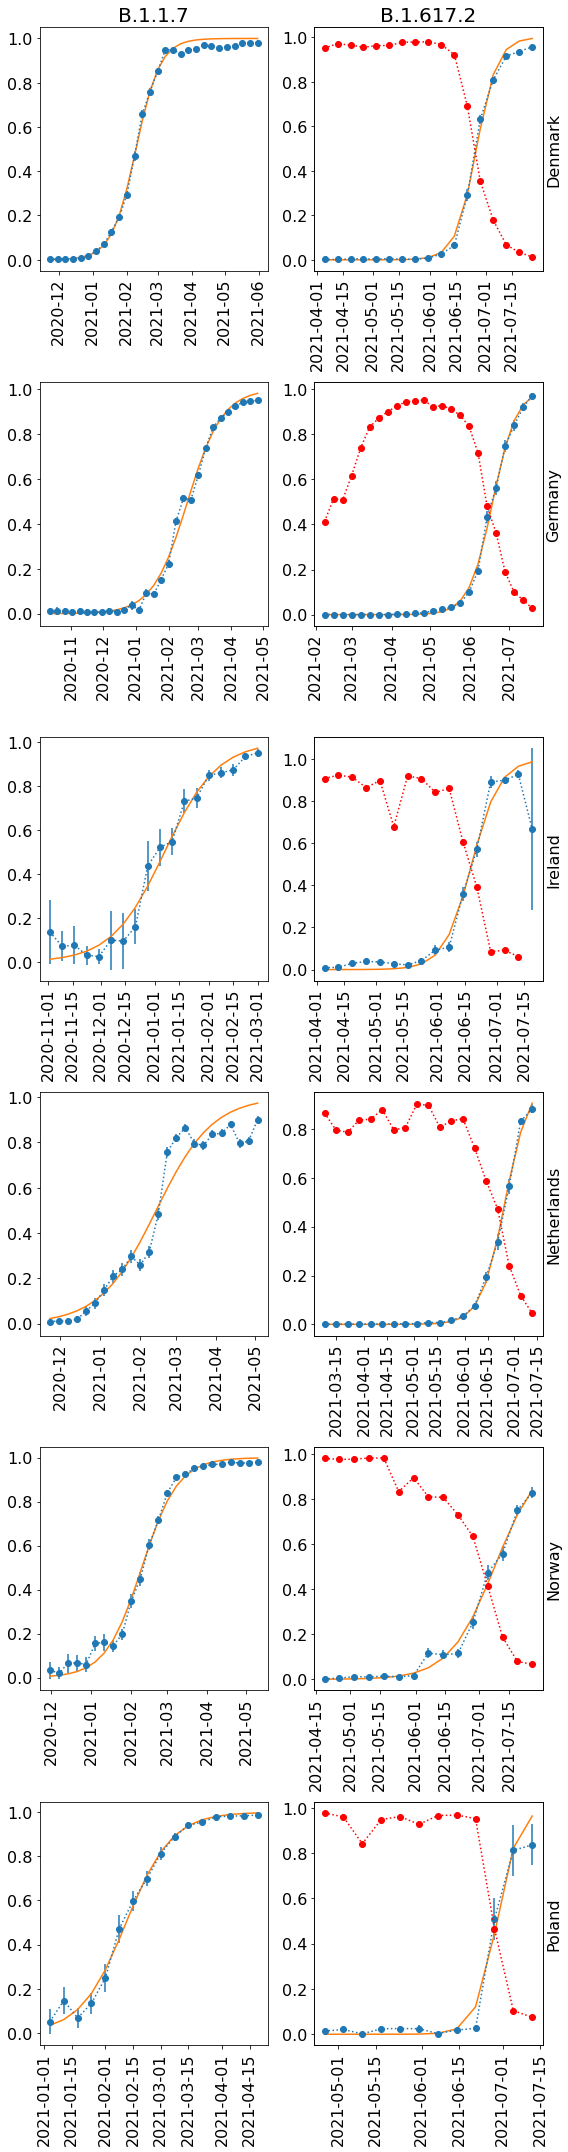

In [15]:
num_seq_df = df.loc[df.groupby(["country", "variant", "date"])["number_sequenced"].idxmax()].dropna()

fig, axs = plt.subplots(len(countries), len(variants), 
                        figsize=(4*len(variants), 5*len(countries)), 
                        tight_layout=True, sharex=False)

if len(np.shape(axs))!= 2:
    axs=np.array([axs]).transpose()

for i,c in enumerate(countries):
    for j,v in enumerate(variants):
        suppl_v = suppl_variants[j]
        # Filtering for country and variant:
        cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==v)
        suppl_cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==suppl_v)
        
        # need to find first non-zero element and max element of each variant to define window:
        start_filt = (num_seq_df.loc[cv_filt].number_detections_variant != 0)
        stop_filt = (num_seq_df.loc[cv_filt].percent_variant == num_seq_df.loc[cv_filt].percent_variant.max())
        
        w_start = num_seq_df.loc[cv_filt&start_filt].date.values[0]
        w_stop = num_seq_df.loc[cv_filt&stop_filt].date.values[0]
        print(w_start, w_stop)
        
        # Filtering for dates:
        date_filt = (num_seq_df.date > w_start) & (num_seq_df.date <= w_stop)

        #defining data for plotting and fitting:
        X_data = num_seq_df.loc[cv_filt&date_filt, "date"]
        Y_data = num_seq_df.loc[cv_filt&date_filt, "percent_variant_adjusted"]
        Y_data_err = 2*num_seq_df.loc[cv_filt&date_filt, "err_percent_variant_adjusted"]
        X_data_num = (pd.to_datetime(X_data.values) - pd.to_datetime(X_data.values[0])) / np.timedelta64(1,'D')
        
        suppl_X_data = num_seq_df.loc[suppl_cv_filt&date_filt, "date"]
        suppl_Y_data = num_seq_df.loc[suppl_cv_filt&date_filt, "percent_variant_adjusted"]
        
        # performing the dataplots associated w a particular strain and country:
        axs[i][j].errorbar(X_data, Y_data, yerr=Y_data_err, marker="o", linestyle=":", label="raw data")
        axs[i][j].errorbar(suppl_X_data, suppl_Y_data, marker="o", linestyle=":", color="red", label="raw data")
        
        axs[i][j].tick_params(axis='x', labelrotation=90)
        
        # performing fitting procedure and plotting of fit:
        p0 = [0.05, 0.003]
        
        popt, pcov = curve_fit(logistic_model, X_data_num, Y_data, p0=p0, sigma=None, maxfev=1200)
        axs[i][j].plot(X_data, logistic_model(X_data_num, *popt))
        
for ax, v in zip(axs[0], variants):
    ax.set_title(v)
    
for ax, c in zip(axs[:,-1], countries):
    ax2 = ax.twinx() 
    ax2.tick_params(right=False, labelright=False)
    ax2.set_ylabel(c)

# num_seq_df.loc[(num_seq_df.country=="Norway")&(num_seq_df.variant=="B.1.617.2")]

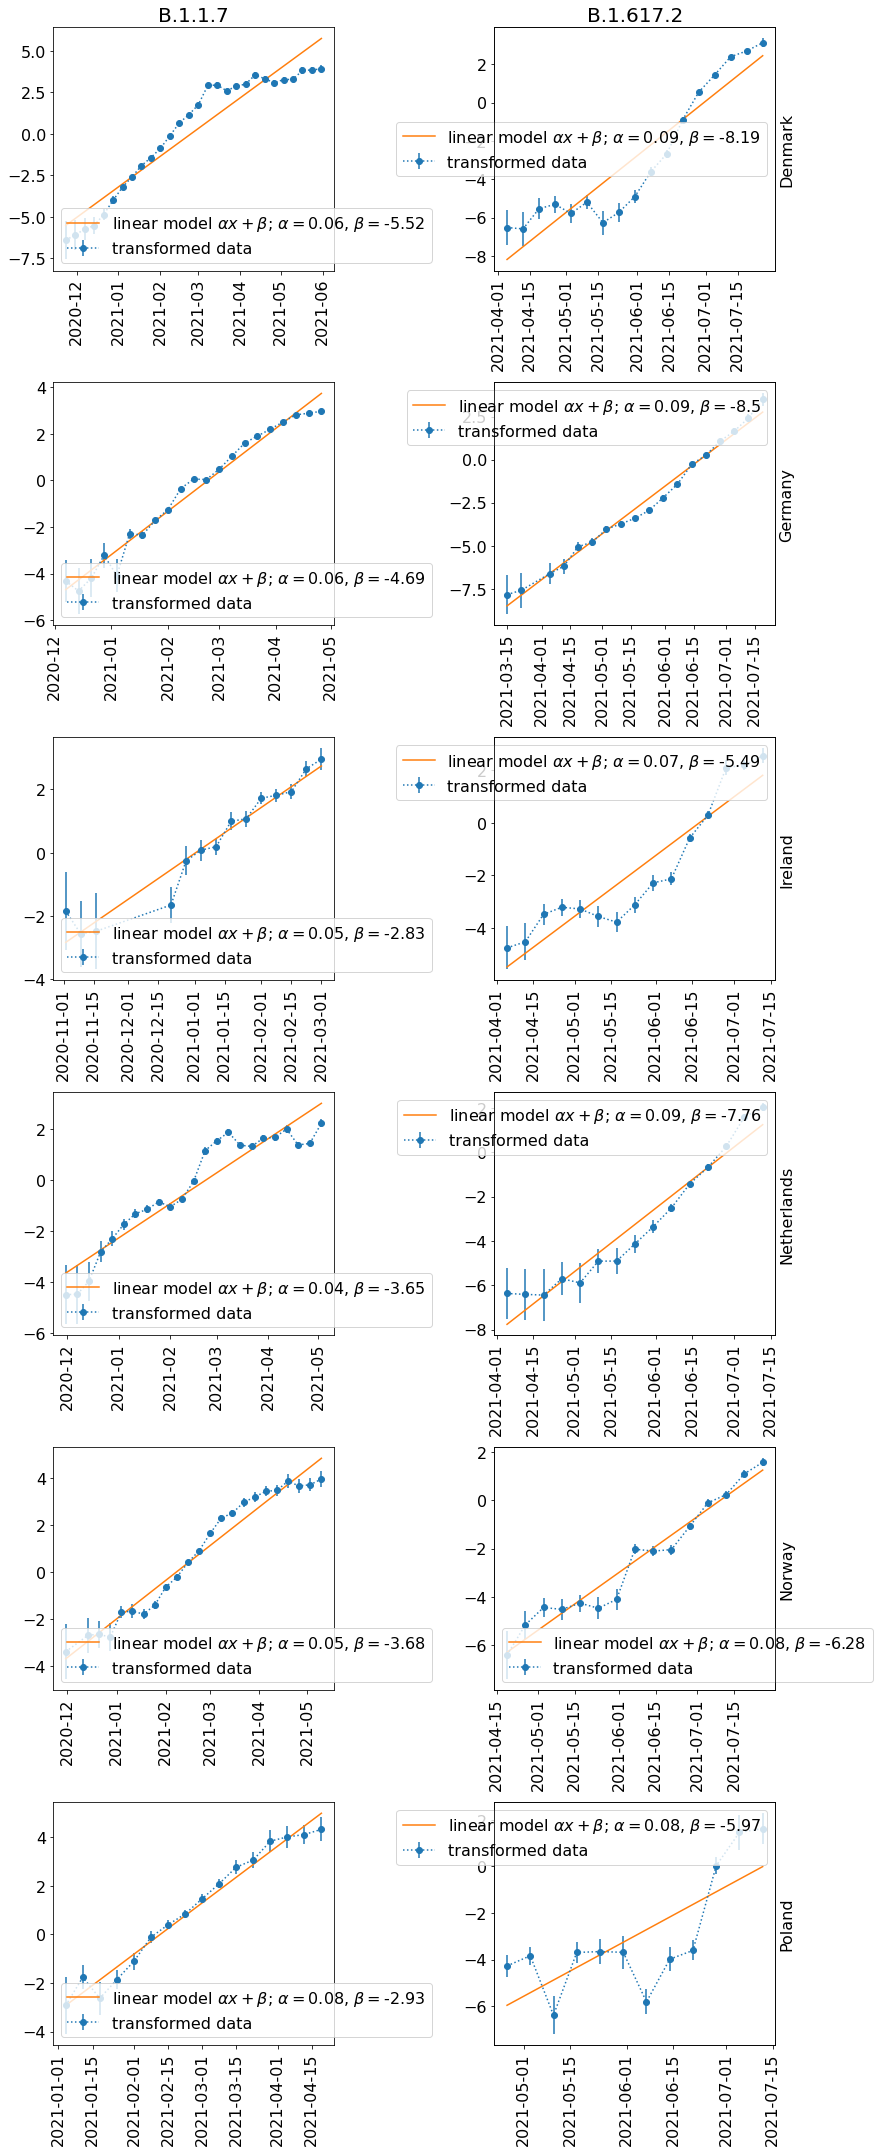

In [16]:
num_seq_df = df.loc[df.groupby(["country", "variant", "date"])["number_sequenced"].idxmax()].dropna()
filt_no_extremes = (num_seq_df["percent_variant"] != 0)&(num_seq_df["percent_variant"] != 1)
num_seq_df = num_seq_df.loc[filt_no_extremes]

#dataframe for saving results: 
#\alpha is incline of linear model
#\beta is the const. offset
lin_results_df = pd.DataFrame(columns=["country", "variant", "alpha", "beta"])

fig, axs = plt.subplots(len(countries), len(variants), 
                        figsize=(6*len(variants), 5*len(countries)), 
                        tight_layout=True, sharex=False)

if len(np.shape(axs))!= 2:
    axs=np.array([axs]).transpose()

for i,c in enumerate(countries):
    for j,v in enumerate(variants):
        # Filtering for country and variant:
        cv_filt = (num_seq_df.country==c)&(num_seq_df.variant==v)
        
        # need to find first non-zero element and max element of each variant to define window:
        start_filt = (num_seq_df.loc[cv_filt].number_detections_variant != 0)
        stop_filt = (num_seq_df.loc[cv_filt].percent_variant == num_seq_df.loc[cv_filt].percent_variant.max())
        
        w_start = num_seq_df.loc[cv_filt&start_filt].date.values[0]
        w_stop = num_seq_df.loc[cv_filt&stop_filt].date.values[0]
        
        # Filtering for dates:
        date_filt = (num_seq_df.date > w_start) & (num_seq_df.date <= w_stop)
        
        #defining the data for plotting and fitting:
        X_data = num_seq_df.loc[cv_filt&date_filt, "date"]
        Y_data = num_seq_df.loc[cv_filt&date_filt, "percent_variant_adjusted"].apply(lambda y: np.log(y/(1-y)))
        Y_data_err = 2*(num_seq_df.loc[cv_filt&date_filt, "percent_variant_adjusted"].apply(lambda y: 1/(y*(1-y)))*num_seq_df.loc[cv_filt&date_filt, "err_percent_variant_adjusted"])
        X_data_num = (pd.to_datetime(X_data.values) - pd.to_datetime(X_data.values[0])) / np.timedelta64(1,'D')

        # performing the dataplots associated w a particular strain and country:
        axs[i][j].errorbar(X_data, Y_data, yerr=Y_data_err, marker="o", linestyle=":", label="transformed data")
        axs[i][j].tick_params(axis='x', labelrotation=90)
        
        # performing fitting procedure and plotting of fit:
        p0 = None #[0.05, 0.003]
        popt, pcov = curve_fit(lin_model, X_data_num, Y_data, p0=p0, maxfev=1200)
        alpha, beta = popt
        lin_results_df = lin_results_df.append({"country":c, "variant":v, "alpha":alpha, "beta":beta}, ignore_index=True)
        label_str = f"linear model $\\alpha x + \\beta$; $\\alpha=${round(alpha, 2)}, $\\beta=${round(beta, 2)}"
        axs[i][j].plot(X_data, lin_model(X_data_num, *popt), label=label_str)
        #axs[i][j].set_yscale("log")
        axs[i][j].legend(loc="best")
        
for ax, v in zip(axs[0], variants):
    ax.set_title(v)
    
for ax, c in zip(axs[:,-1], countries):
    ax2 = ax.twinx() 
    ax2.tick_params(right=False, labelright=False)
    ax2.set_ylabel(c)

#transform = lambda y: np.log(y/(1-y))
#print(transform(0.4))
    
#num_seq_df
# lin_results_df

In [17]:
relative_alphas = []
for c in countries:
    tmp_df = lin_results_df.loc[lin_results_df.country==c]#.reset_index()
    
    alpha_new = tmp_df.loc[tmp_df.variant=="B.1.617.2"].reset_index().at[0, "alpha"]
    alpha_old = tmp_df.loc[tmp_df.variant=="B.1.1.7"].reset_index().at[0, "alpha"]
    relative_alphas.append((alpha_new - alpha_old)/alpha_old)

relative_alphas

[0.5921331291304376,
 0.48535643169712345,
 0.5887747420666739,
 1.1277553978347077,
 0.44997310272222496,
 0.026468045278316154]

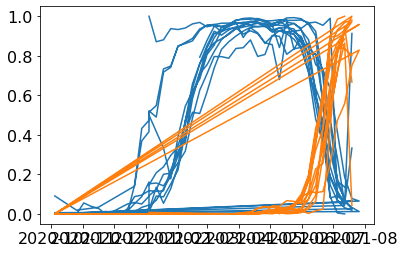

In [13]:
fig, ax = plt.subplots(1,1)
for v in df.variant.unique():
    tmp_df = df.loc[df.variant == v]
    ax.plot(tmp_df.date, tmp_df.percent_variant)